In [1]:
#DONE BY
#CS20B1057
#A S V DHANUSH
#Breast Cancer Wisconsin (Diagnostic) Data Set
#Predict whether the cancer is benign or malignant (WHETHER PATIENT HAS CANCER OR NOT)
#Benign tissue is called healthy and malignant tissue is considered cancerous.
#M = Malignant , B=Benign

'''During a fine needle aspiration (FNA), a small amount of breast tissue or fluid is removed from a suspicious area with a thin,
hollow needle and checked for cancer cells.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass
They describe characteristics of the cell nuclei present in the image.'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score as accs
from sklearn.metrics import confusion_matrix as cm
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

df = pd.read_csv("cancer_data.csv")
#print(df) 
print(f"THE MATRIX SIZE : {df.shape}")
print("-------------------------------------------------------------------------------------------------------")
#checking for datatypes
print(df.dtypes)
print("-------------------------------------------------------------------------------------------------------")

THE MATRIX SIZE : (569, 32)
-------------------------------------------------------------------------------------------------------
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            f

In [2]:
#copying the data frames data into another dataframe
df_copy = df.copy(deep = True)
#getting the detais of df_copy dataframe
print("------------------------------------------DESCRIBE-----------------------------------------------------")
print(df_copy.describe().transpose())
print("-------------------------------------------------------------------------------------------------------")

------------------------------------------DESCRIBE-----------------------------------------------------
                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960

In [3]:
#removing the duplicate values in this dataframe
retStatus = df_copy.drop_duplicates(inplace=True)
print("IF DUPLICATES ARE NOT PRESENT THEN OUT WILL BE 'None'")
print(f"Are Duplicates Present? :{retStatus}")

#since there are no duplicates in this dataframe we will go ahead and remove NaN values in this dataframe
#df_without_nan = df_copy.dropna()
#print(df_without_nan)
#since there are no NaN entries in our dataframe we can move forward to plotting the graphs adn synthesizing the data and remvoing the outliers

IF DUPLICATES ARE NOT PRESENT THEN OUT WILL BE 'None'
Are Duplicates Present? :None


In [4]:
#dividing the dataset based on the diagnosis (based of M OR B)
#MALIGNANT DATAFRAME DETAILS

print("--------------------------------------------MALIGNANT--------------------------------------------------")
df_malignant = df_copy[df["diagnosis"] == 'M']
print(f"The size of Malignant dataset : {df_malignant.shape}")
#print(df_malignant)
print(df_malignant.describe().transpose())
print("-------------------------------------------------------------------------------------------------------")


--------------------------------------------MALIGNANT--------------------------------------------------
The size of Malignant dataset : (212, 32)
                         count          mean           std          min  \
id                       212.0  3.681805e+07  1.378965e+08  8670.000000   
radius_mean              212.0  1.746283e+01  3.203971e+00    10.950000   
texture_mean             212.0  2.160491e+01  3.779470e+00    10.380000   
perimeter_mean           212.0  1.153654e+02  2.185465e+01    71.900000   
area_mean                212.0  9.783764e+02  3.679380e+02   361.600000   
smoothness_mean          212.0  1.028985e-01  1.260824e-02     0.073710   
compactness_mean         212.0  1.451878e-01  5.398750e-02     0.046050   
concavity_mean           212.0  1.607747e-01  7.501933e-02     0.023980   
concave points_mean      212.0  8.799000e-02  3.437391e-02     0.020310   
symmetry_mean            212.0  1.929090e-01  2.763809e-02     0.130800   
fractal_dimension_mean   212.

In [5]:
#BENIGN DATAFRAME DETAILS
print("--------------------------------------------BENIGN-----------------------------------------------------")
df_benign = df_copy[df["diagnosis"] == 'B']
print(f"The size is of Benign dataset : {df_benign.shape}")
#print(df_benign)
df_copy['diagnosis'] = df_copy.diagnosis.astype('category')
print(df_benign.describe().transpose())
print("-------------------------------------------------------------------------------------------------------")

--------------------------------------------BENIGN-----------------------------------------------------
The size is of Benign dataset : (357, 32)
                         count          mean           std          min  \
id                       357.0  2.654382e+07  1.167397e+08  8913.000000   
radius_mean              357.0  1.214652e+01  1.780512e+00     6.981000   
texture_mean             357.0  1.791476e+01  3.995125e+00     9.710000   
perimeter_mean           357.0  7.807541e+01  1.180744e+01    43.790000   
area_mean                357.0  4.627902e+02  1.342871e+02   143.500000   
smoothness_mean          357.0  9.247765e-02  1.344608e-02     0.052630   
compactness_mean         357.0  8.008462e-02  3.374995e-02     0.019380   
concavity_mean           357.0  4.605762e-02  4.344215e-02     0.000000   
concave points_mean      357.0  2.571741e-02  1.590878e-02     0.000000   
symmetry_mean            357.0  1.741860e-01  2.480676e-02     0.106000   
fractal_dimension_mean   357.

In [6]:
print("---------------------------- DATA FRAME GROUPED BY DIAGNOSIS COUNT ------------------------------------")
print(df_copy.groupby(["diagnosis"]).count())
print("-------------------------------------------------------------------------------------------------------")
#finding the ratio of  benign and benign
ratio = df_benign["diagnosis"].count()/df_malignant["diagnosis"].count()

print(f"RATIO OF BENIGN / MALIGNANT : {math.ceil(ratio)}")
#SINCE THE RATIO IS CLOSE TO 2:1 WE CAN PREDICT FOR NOW THAT MOJORILY BENIGN DIAGNOSIS IS MORE (HEALTHY PATIENTS ARE MORE)!

---------------------------- DATA FRAME GROUPED BY DIAGNOSIS COUNT ------------------------------------
            id  radius_mean  texture_mean  perimeter_mean  area_mean  \
diagnosis                                                              
B          357          357           357             357        357   
M          212          212           212             212        212   

           smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                      
B                      357               357             357   
M                      212               212             212   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
B                          357            357  ...           357   
M                          212            212  ...           212   

           texture_worst  perimeter_worst  area_worst  smoothness_worst  \
di

In [7]:

#Since we dont need the patient id for the prediction of brest cancer
#we drop the id column

df_copy = df_copy.drop(labels = "id" ,axis=1)
#print(df_copy)
#id column has been dropped
df_without_diagnosis = df_copy.drop(["diagnosis"],axis=1)
#dataframe without diagnosis column
print(df_without_diagnosis)
print("-------------------------------------------------------------------------------------------------------")

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [8]:
#WE NORMALISE THE DATA BEFORE FINDING DOING THE CLASSIFICATION
cols = list(df_without_diagnosis.columns)
for i in cols:
    col_zscore = i + '_scaled'
    df_without_diagnosis[col_zscore] = (df_without_diagnosis[i]-df_without_diagnosis[i].mean())/df_without_diagnosis[i].std(ddof=0)
#print(f"---------------------------------------NORMALIZED VALUES OF THE DATA SET------------------------------\n{df_without_diagnosis}")

#print("-------------------------------------------------------------------------------------------------------")
#print("____________________________________K-NEAREST NEIGHBOURS CLASSIFIER____________________________________")
X_train, X_test, X_label_train, X_label_test = train_test_split(df_without_diagnosis,df_copy["diagnosis"],test_size=0.3, random_state=42)
#dropping the 'Class' column is the training and testing array

acc_list=[]
acc_index=[]
#for i in range(1,100,2):
    #K-Nearest Neigbours for K = 11
n1 = knn(n_neighbors=11)
n1.fit(X_train, X_label_train)

pred1 = n1.predict(X_test)
print("The Predicted Values Are")
print(pred1)

print("Confusion Matrix")
confusion1 =  cm(X_label_test, pred1)
print(confusion1)
#print("Accuracy Score")
accur1 = accs(X_label_test,pred1)
acc_list.append(accur1)
acc_index.append(i)
#print(accur1)
print(f"----------------------------------------THE KNN FOR K VALUES TILL 100--------------------------------- \n{acc_list}")
print("-------------------------------------------------------------------------------------------------------")
        

The Predicted Values Are
['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'B' 'B'
 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B'
 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M'
 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M'
 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'M'
 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B'
 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B']
Confusion Matrix
[[107   1]
 [  3  60]]
----------------------------------------THE KNN FOR K VALUES TILL 100--------------------------------- 
[0.9766081871345029]
-------------------------------------------------------------------------------------------------------


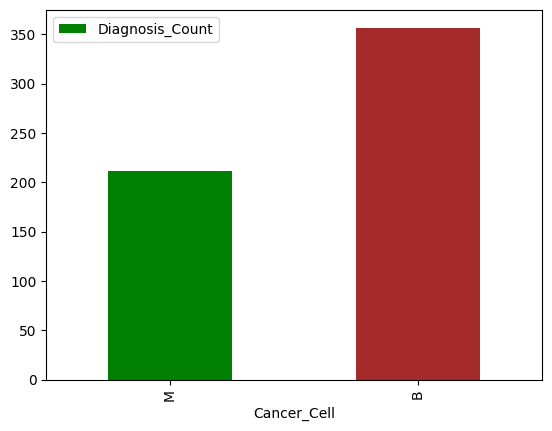

In [9]:
#PLOTTING GRAPH BETWEEN NUMBER OF MALIGNANT AND BENIGN CASES
df_plot = pd.DataFrame({'Cancer_Cell':['M', 'B'], 'Diagnosis_Count':[df_malignant["diagnosis"].count(),df_benign["diagnosis"].count()]})
ax = df_plot.plot.bar( x='Cancer_Cell',y='Diagnosis_Count',color=['green','brown'])

C:\Users\91818\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


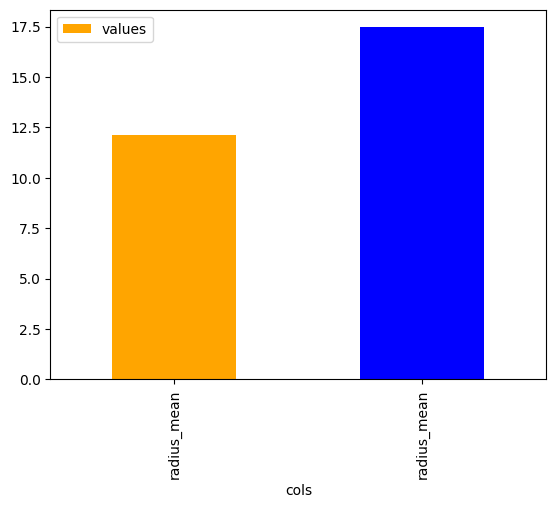

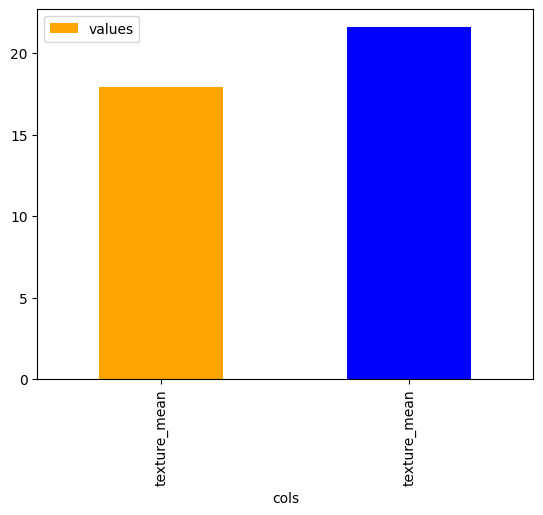

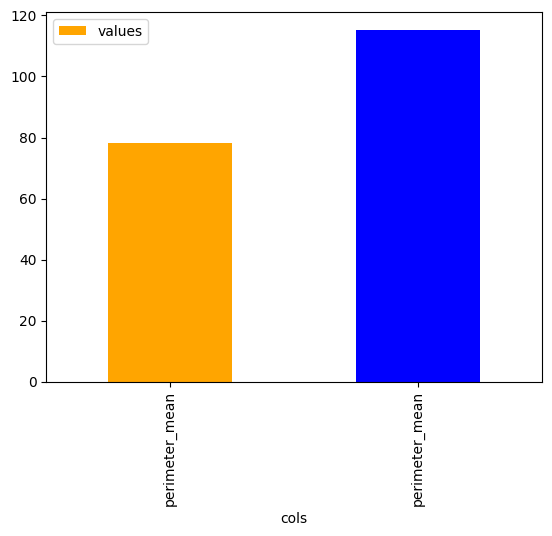

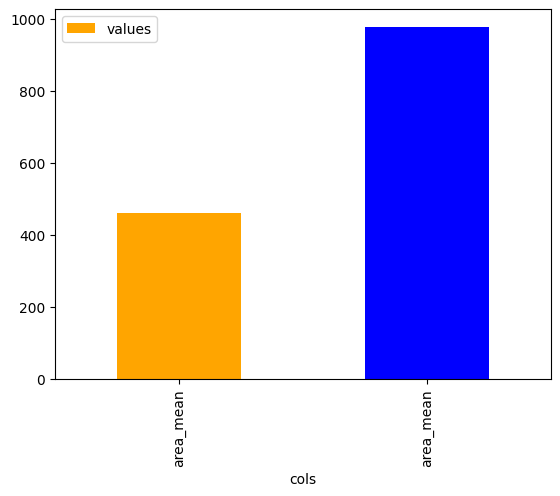

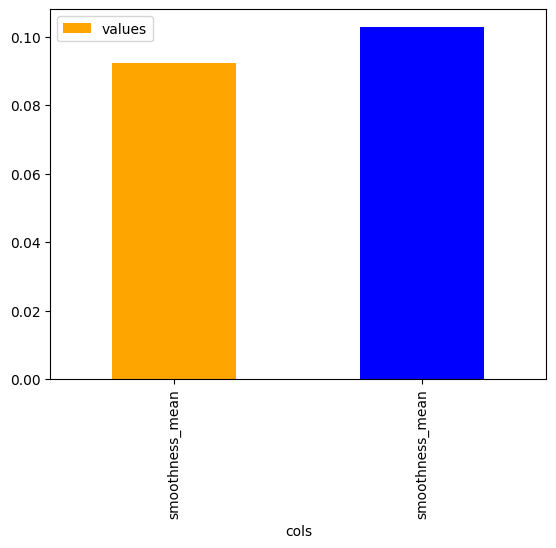

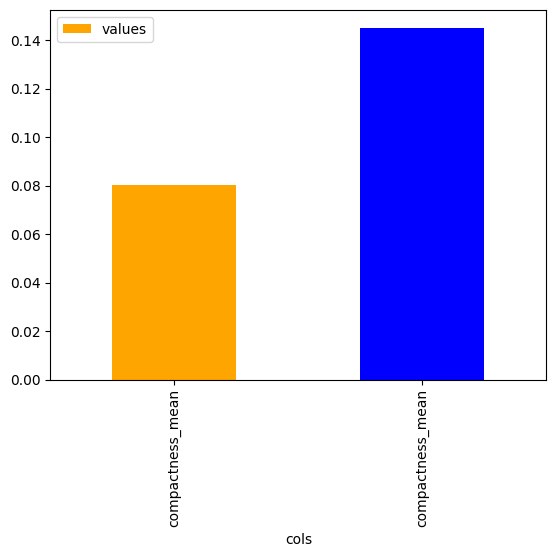

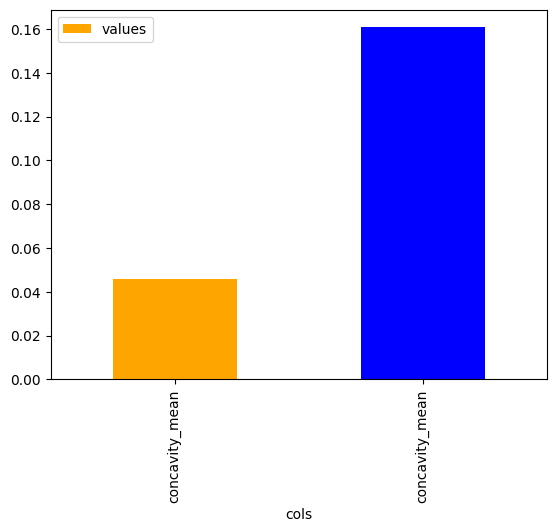

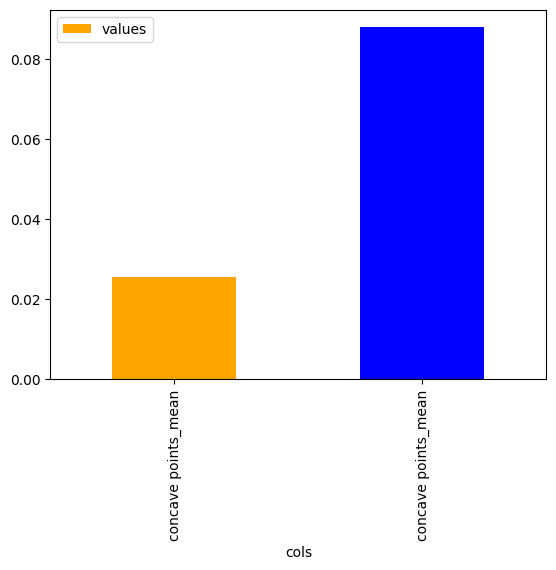

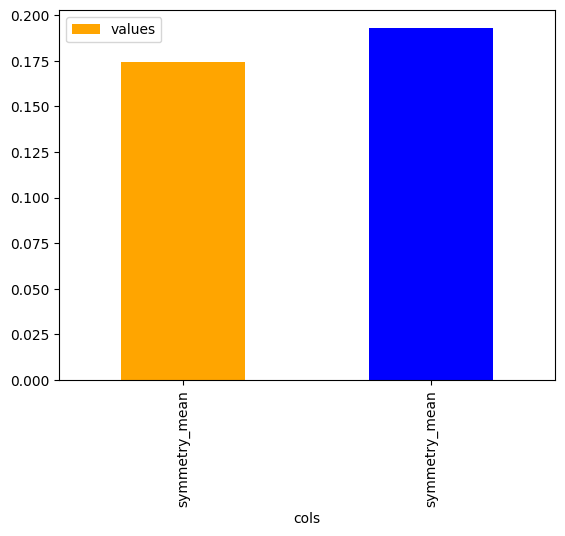

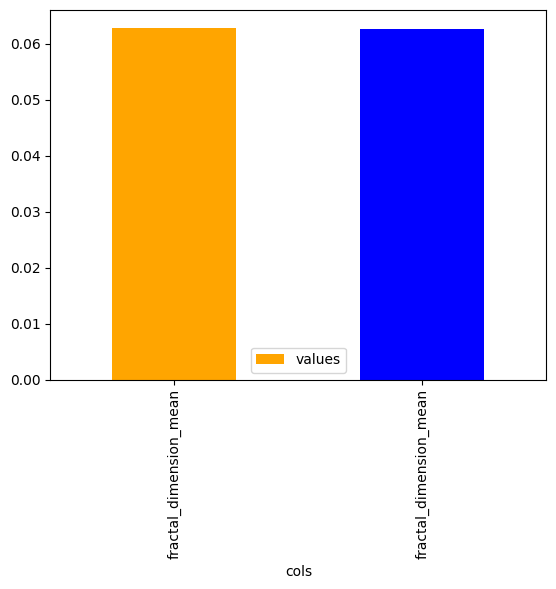

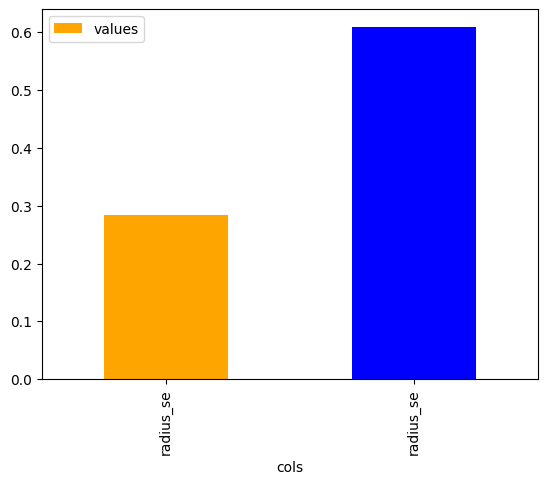

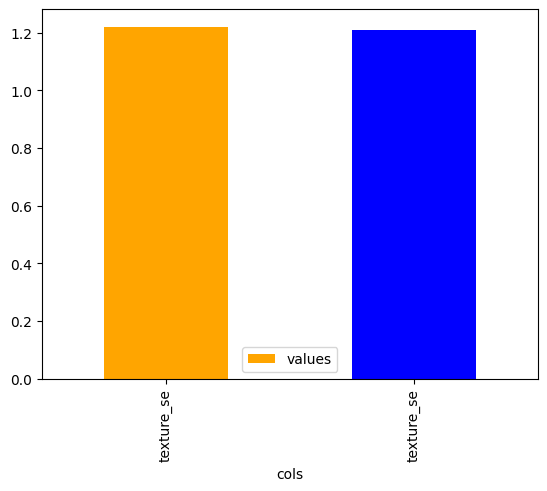

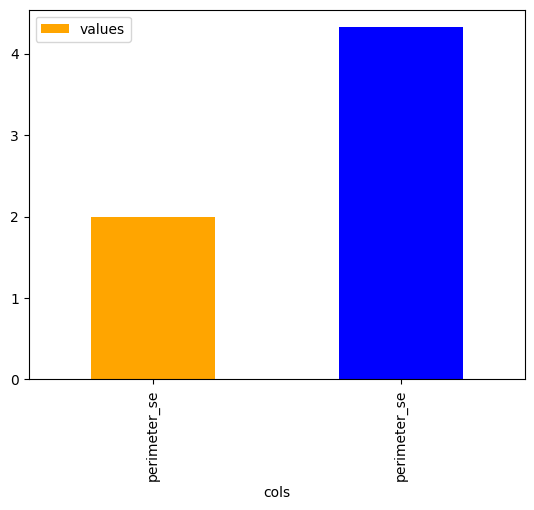

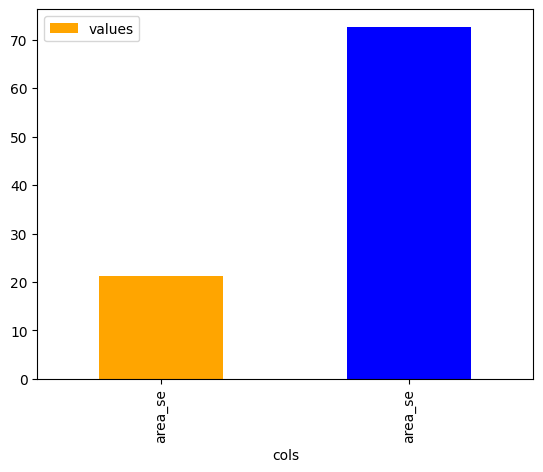

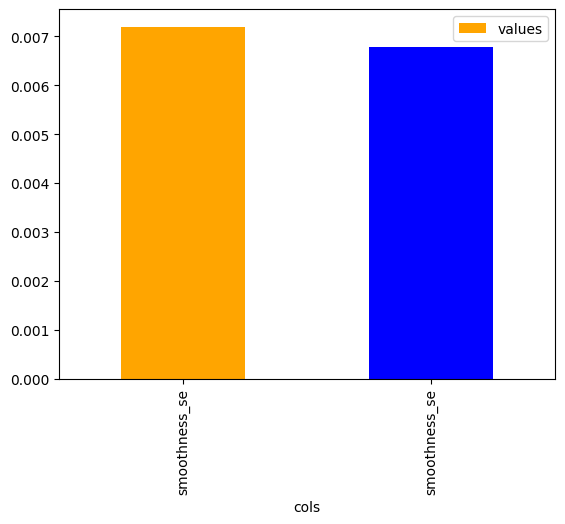

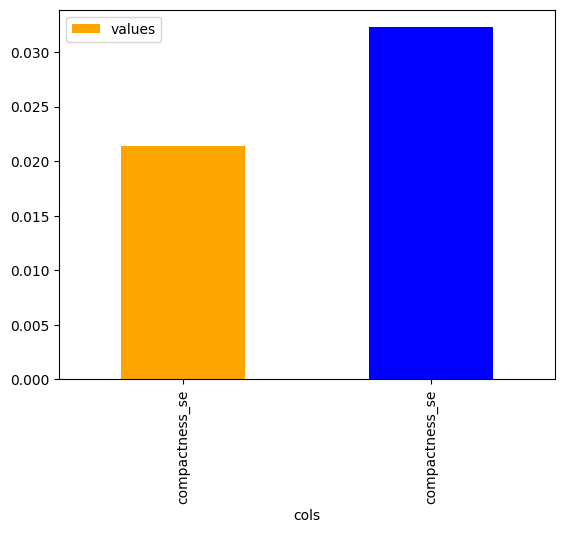

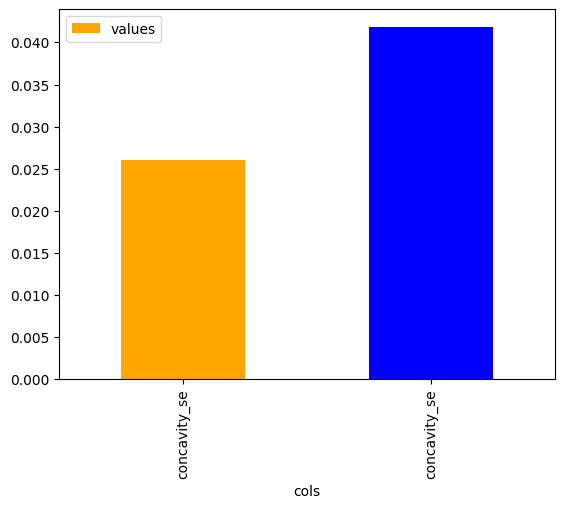

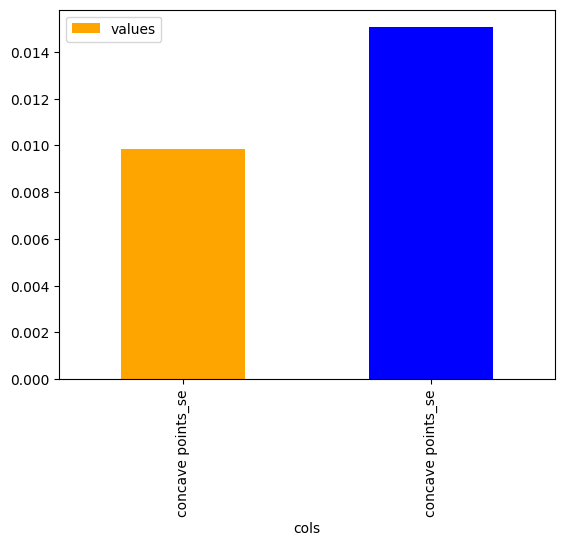

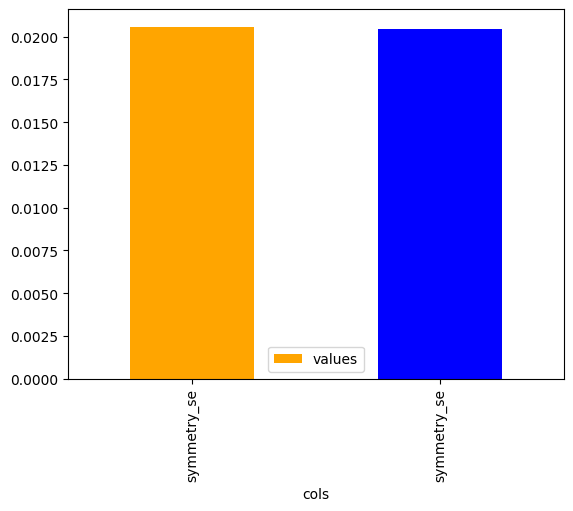

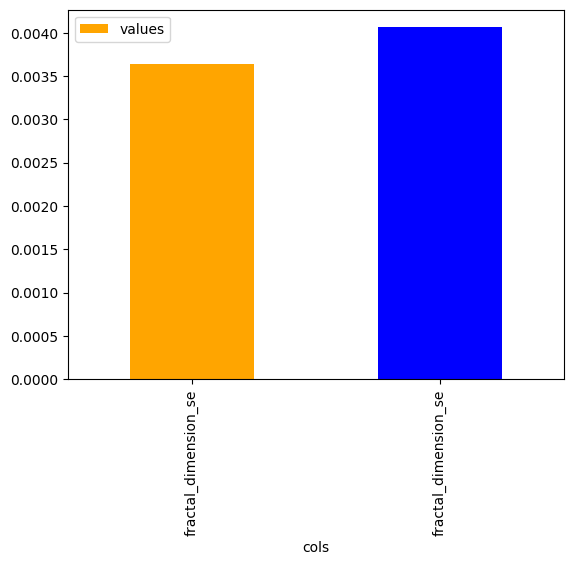

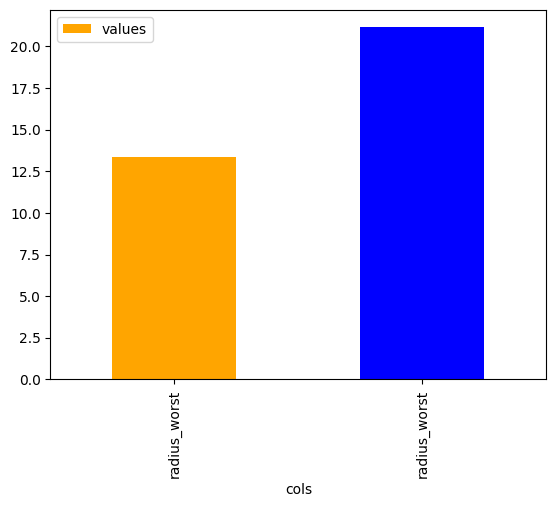

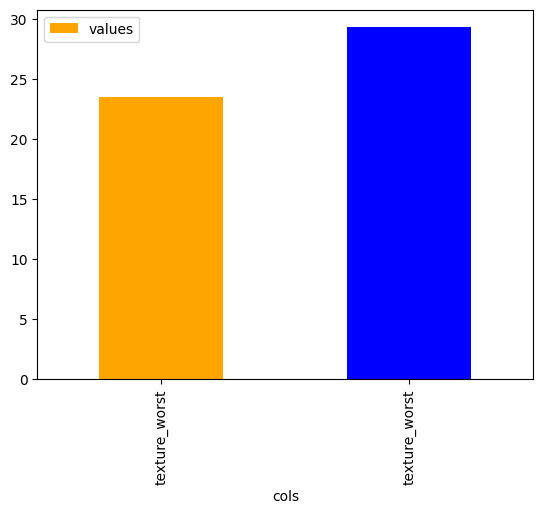

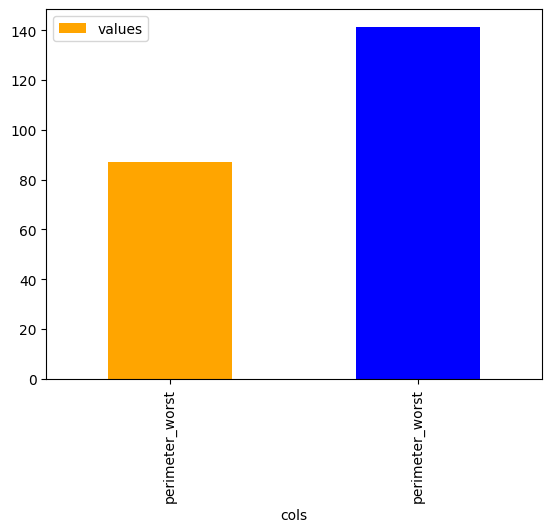

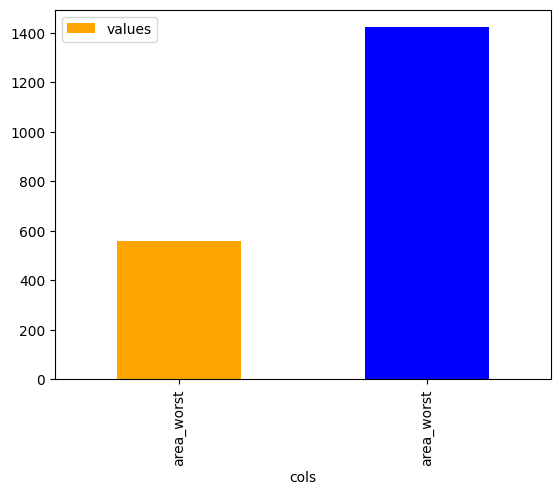

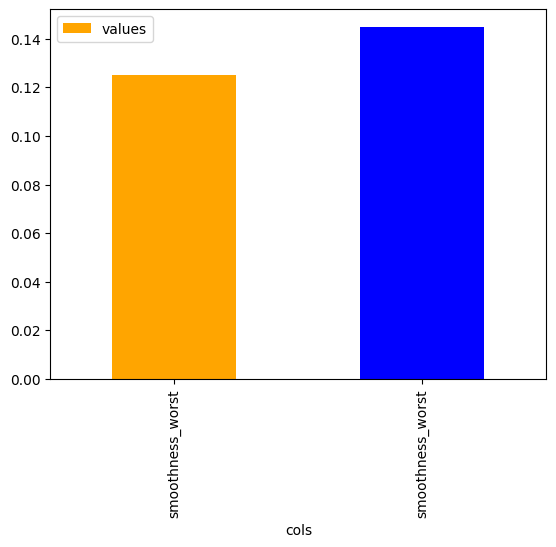

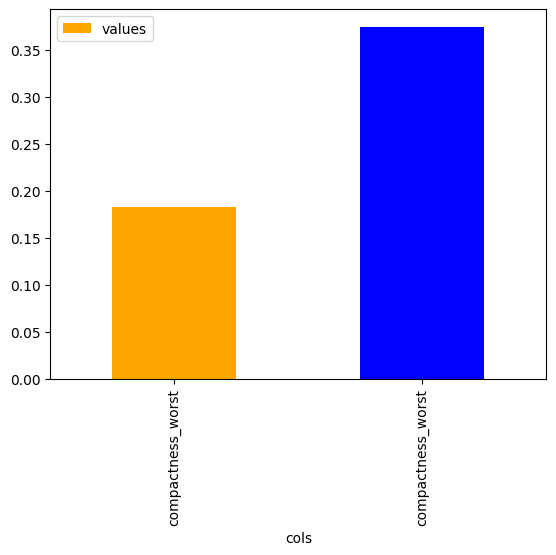

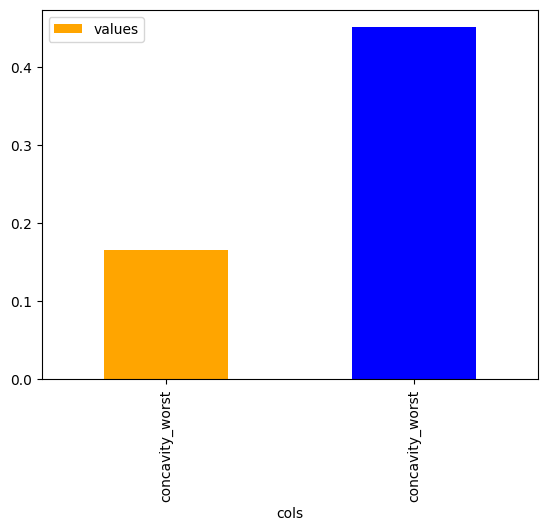

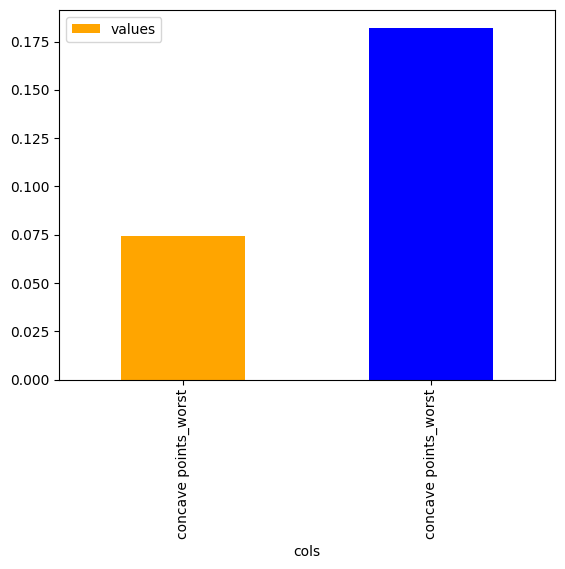

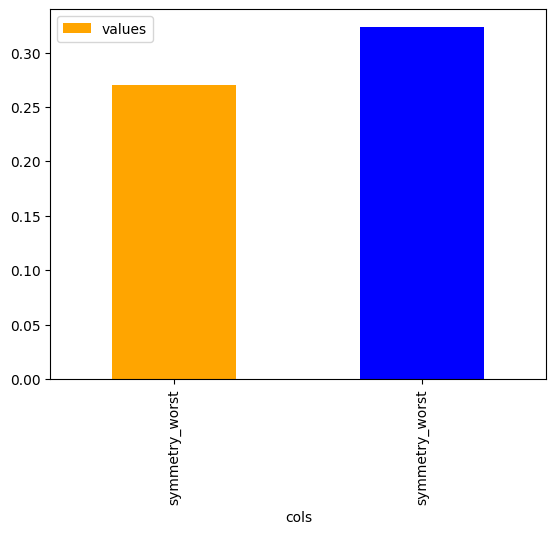

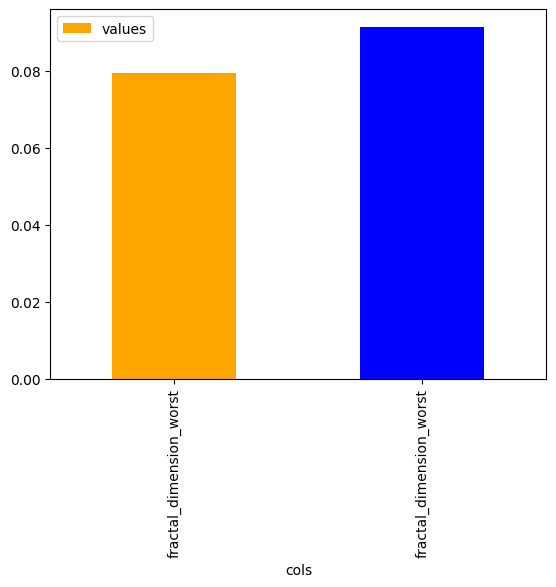

In [10]:
#PLOTTING THE MEANS FOF EACH FEATURE FOR MALIGNANT AND BENIGN
list_col = []
list_col_means_m = []
list_col_means_b = []
for i in df_copy.columns:
    if(i != "diagnosis" and i!= "id"):
        list_col.append(i)
        list_col_means_m.append(df_malignant[i].mean())
        list_col_means_b.append(df_benign[i].mean())
        df_plot1 = pd.DataFrame({'cols':i ,'values':{'M':df_malignant[i].mean(),'B':df_benign[i].mean()}})
        ax1 = df_plot1.plot.bar( x='cols',y='values',color=['orange','blue'])

In [ ]:
#KNN PLOT FOR K VALUES TILL 100
#TREND FOR KNN AS WE INCREASE THE VALUE OF K
#KDE PLOT
sns.kdeplot(acc_list)


<AxesSubplot: >

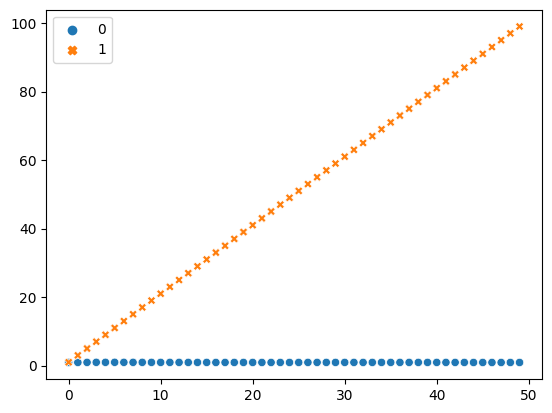

In [31]:
#SCATTERPLOT
sns.scatterplot([acc_list,acc_index])